Simulating trajectories from a cloud of initial conditions near (1, 1, 1)...


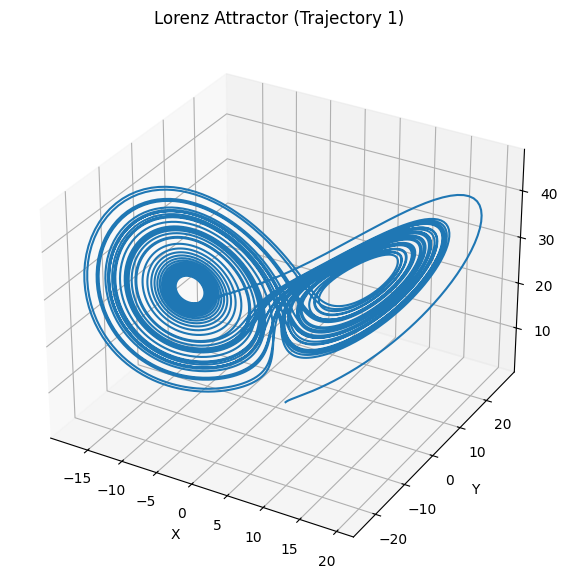

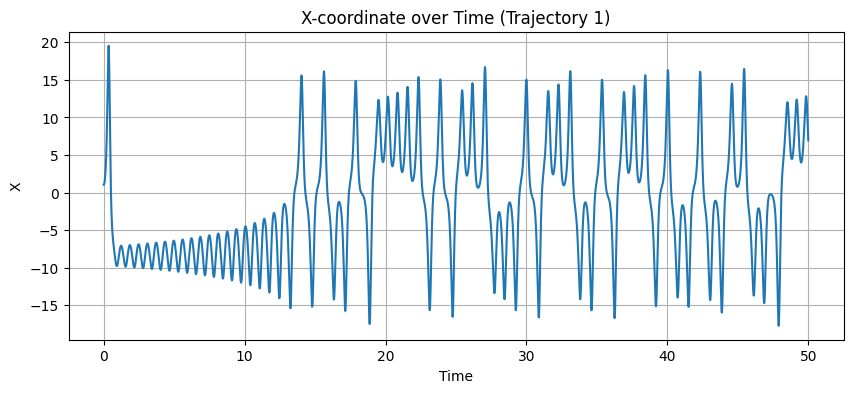

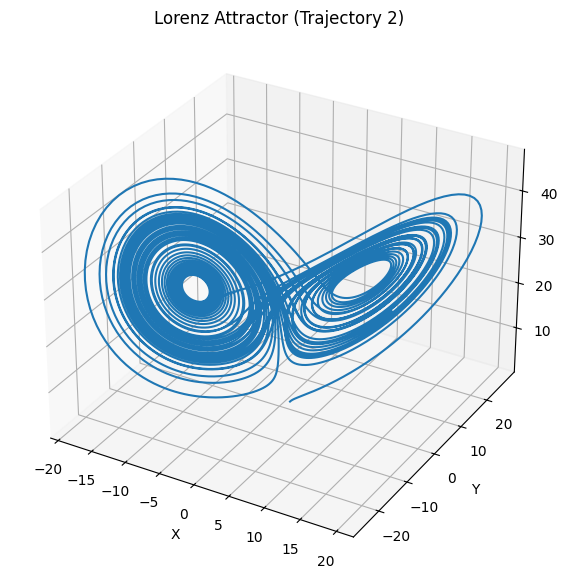

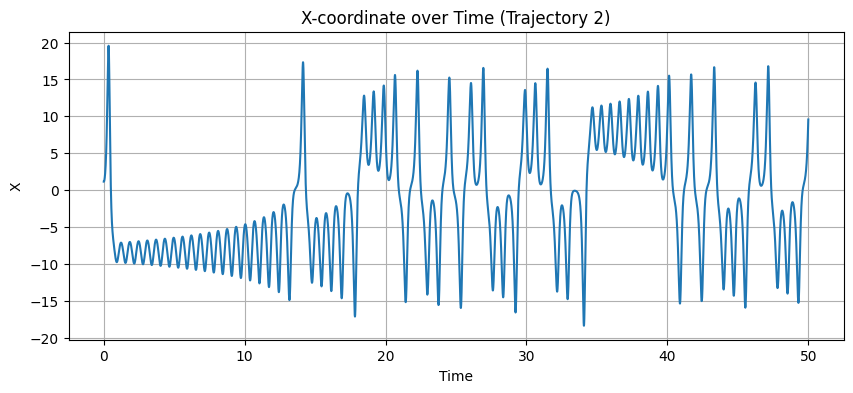

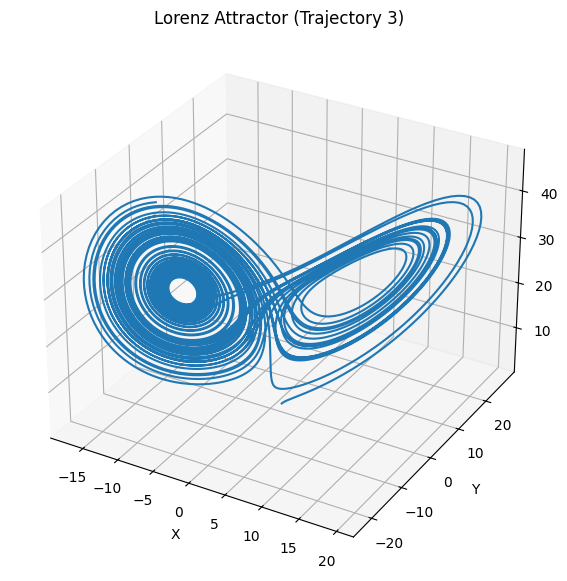

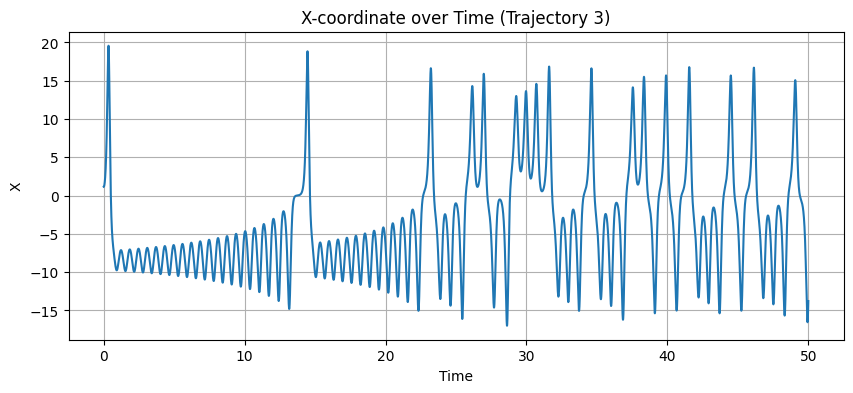

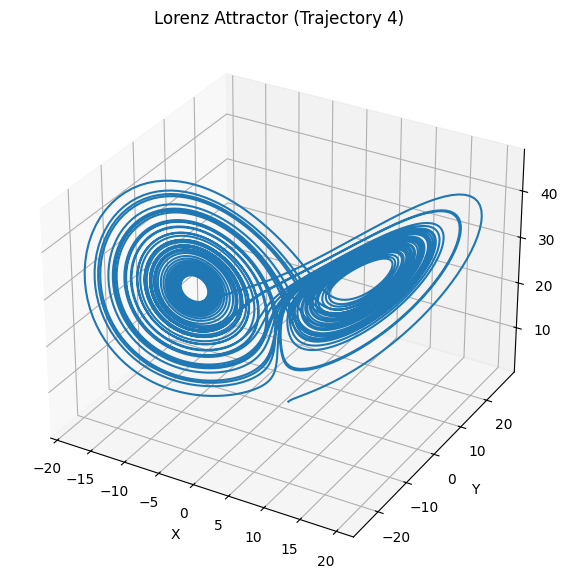

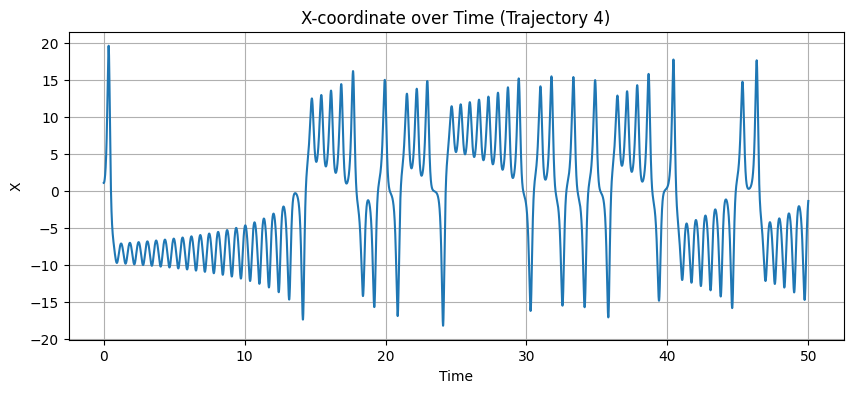

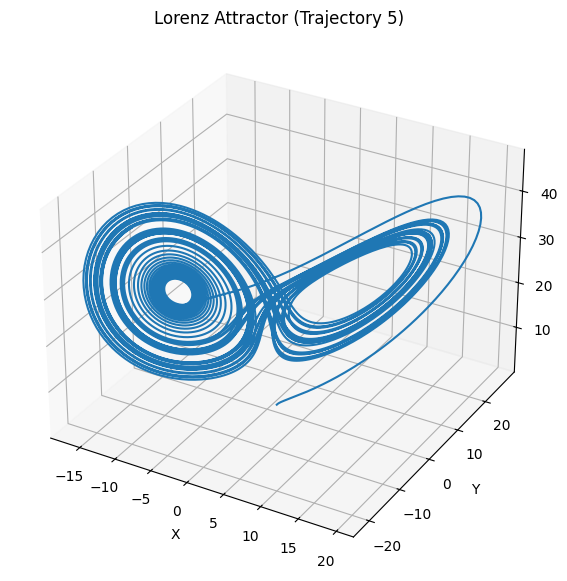

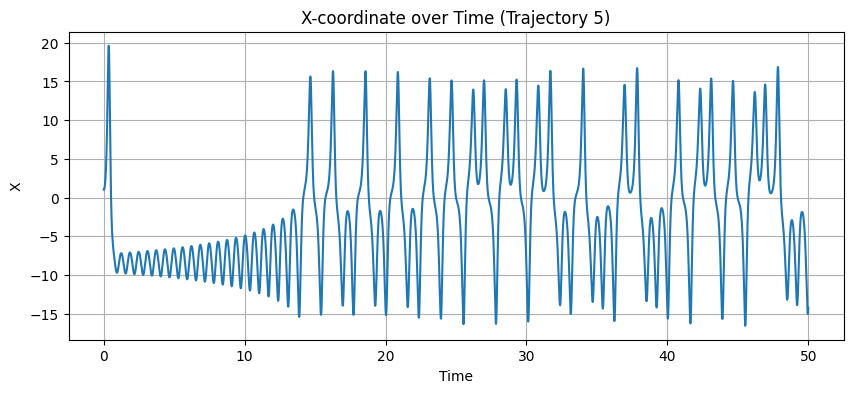

Simulating trajectories from initial conditions with large coordinates...


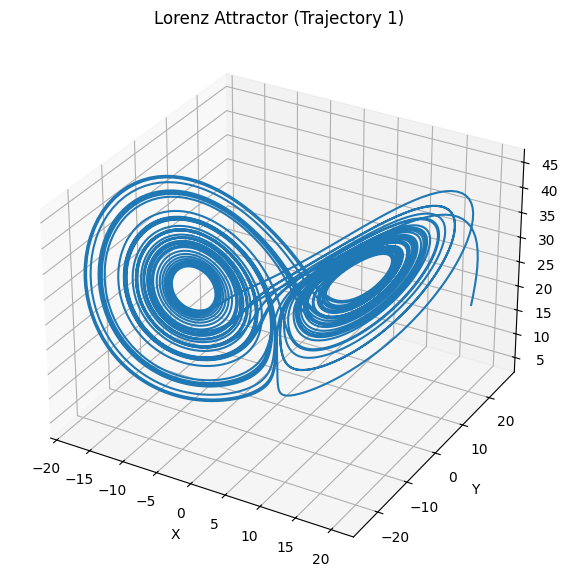

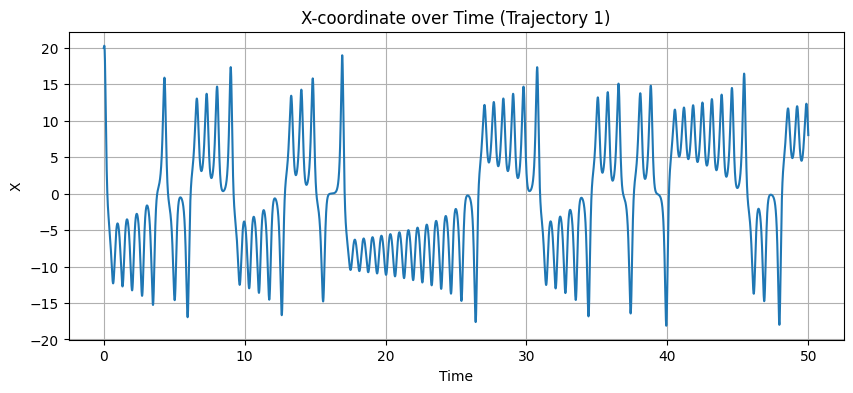

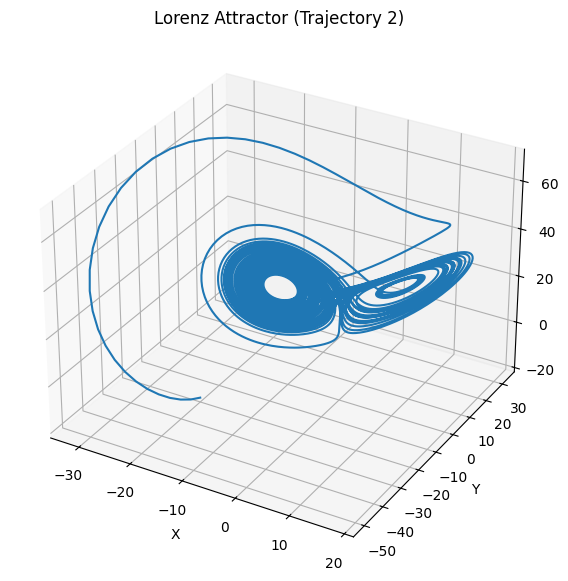

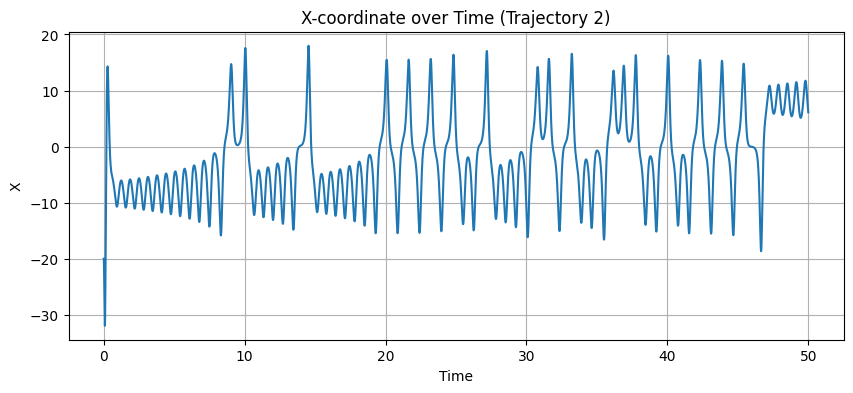

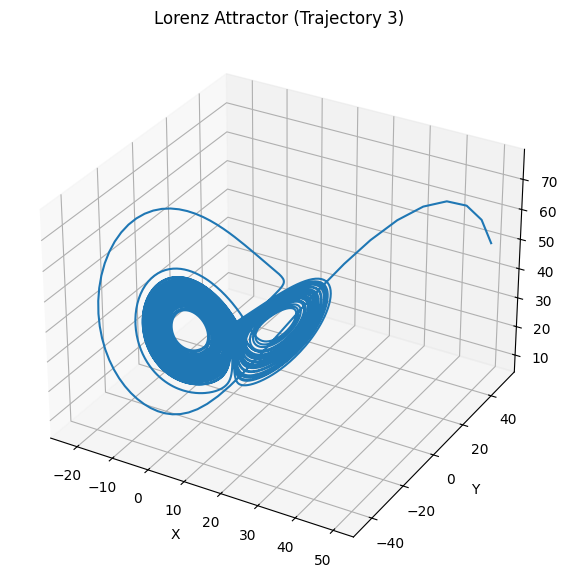

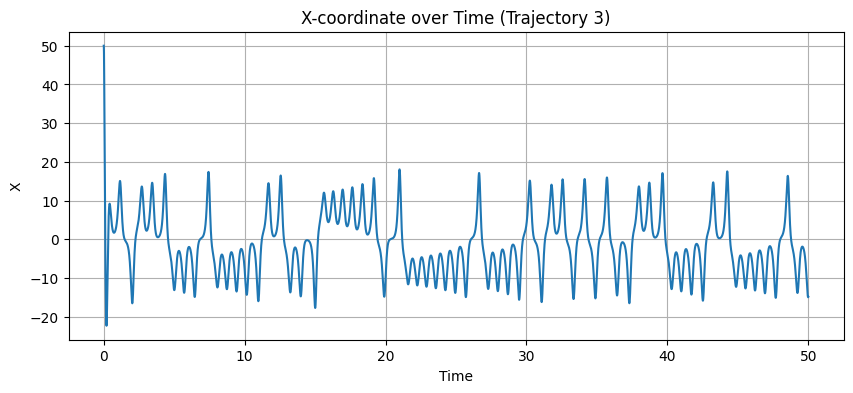

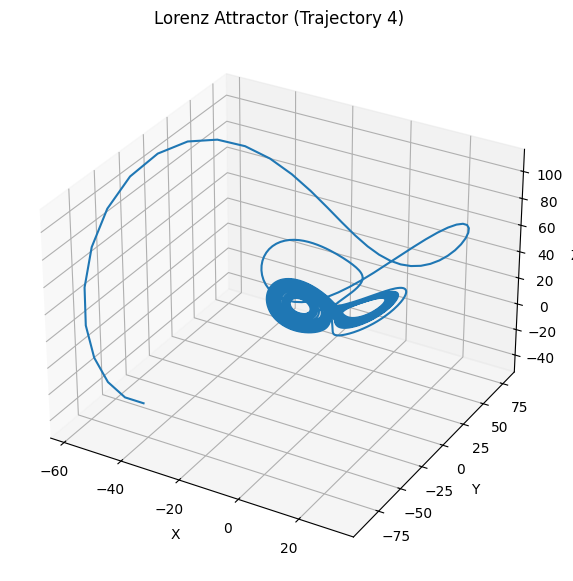

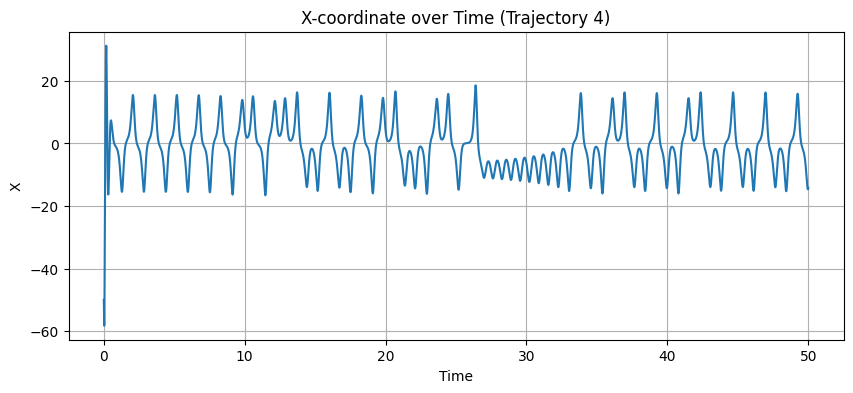

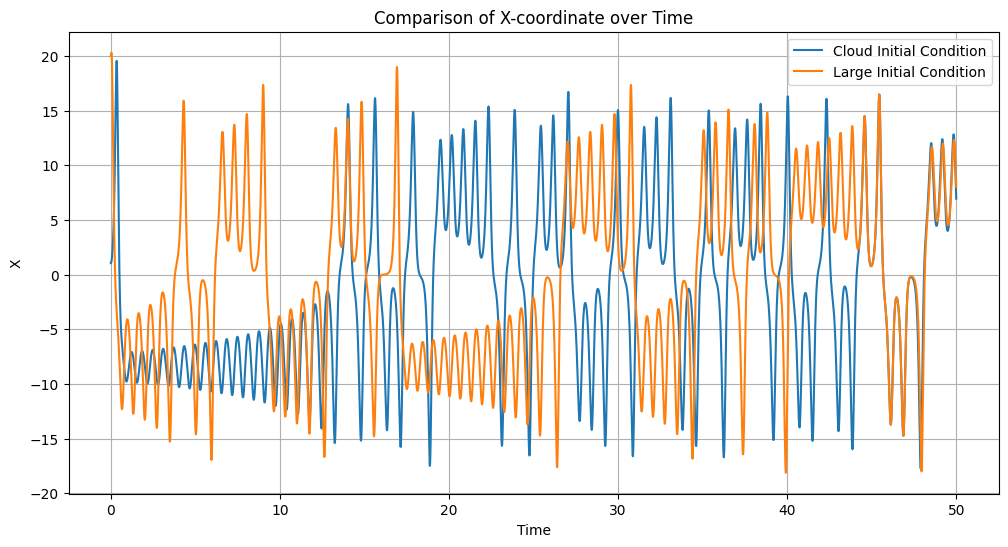

In [1]:
# Import necessary libraries
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Lorenz system
def lorenz_system(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time span
t_start = 0.0
t_end = 50.0
num_points = 10000
t = np.linspace(t_start, t_end, num_points)

# Function to simulate and plot trajectories
def simulate_lorenz(initial_conditions, t, sigma, beta, rho, plot_3d=True, plot_x=True):
    trajectories = []
    for idx, state0 in enumerate(initial_conditions):
        # Integrate the Lorenz equations
        states = odeint(lorenz_system, state0, t, args=(sigma, beta, rho))
        trajectories.append(states)

        # Plotting
        if plot_3d:
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            ax.plot(states[:, 0], states[:, 1], states[:, 2])
            ax.set_title(f'Lorenz Attractor (Trajectory {idx+1})')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.show()

        if plot_x:
            plt.figure(figsize=(10, 4))
            plt.plot(t, states[:, 0])
            plt.title(f'X-coordinate over Time (Trajectory {idx+1})')
            plt.xlabel('Time')
            plt.ylabel('X')
            plt.grid(True)
            plt.show()
    return trajectories

# Part 1: Cloud of Initial Conditions Near a Point
# Starting near (1, 1, 1)
num_initial_conditions = 5
epsilon = 0.1  # Small perturbation
initial_conditions_cloud = []

np.random.seed(42)  # For reproducibility
for _ in range(num_initial_conditions):
    perturbation = epsilon * np.random.randn(3)
    state0 = [1.0 + perturbation[0], 1.0 + perturbation[1], 1.0 + perturbation[2]]
    initial_conditions_cloud.append(state0)

print("Simulating trajectories from a cloud of initial conditions near (1, 1, 1)...")
trajectories_cloud = simulate_lorenz(initial_conditions_cloud, t, sigma, beta, rho)

# Part 2: Starting with Large Coordinates
initial_conditions_large = [
    [20.0, 20.0, 20.0],
    [-20.0, -20.0, -20.0],
    [50.0, 50.0, 50.0],
    [-50.0, -50.0, -50.0]
]

print("Simulating trajectories from initial conditions with large coordinates...")
trajectories_large = simulate_lorenz(initial_conditions_large, t, sigma, beta, rho)

# Part 3: Comparing X-coordinate Plots
# Choose one trajectory from each set
trajectory_cloud = trajectories_cloud[0]
trajectory_large = trajectories_large[0]

plt.figure(figsize=(12, 6))
plt.plot(t, trajectory_cloud[:, 0], label='Cloud Initial Condition')
plt.plot(t, trajectory_large[:, 0], label='Large Initial Condition')
plt.title('Comparison of X-coordinate over Time')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.grid(True)
plt.show()
